In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (5).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (26).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (53).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (49).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (50).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (24).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (88).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (64).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (54).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test/Sandals/image (9).jpg
/kaggle/input/simple-shoe-classification/Shoe Classification/s

In [24]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [25]:
!pip install split_folders -q
import splitfolders

In [26]:
Image_size= 256
Batch_size= 32
Channel = 3

In [27]:
data_dir = "/kaggle/input/simple-shoe-classification/Shoe Classification/train"

**Splitting train data into training and validation for feeding into the model**

In [28]:
#To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`
splitfolders.ratio(data_dir, output="./Validation",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 778 files [00:01, 514.31 files/s]


In [29]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #each and every pixel value will be multiplied with 1.0/255.0
        shear_range=0.2, #Bigger the number higher is the shearing in synthetic images
        zoom_range=0.2, #range will be from 0 to 0.2
        horizontal_flip=True)

In [30]:
train_generator = train_datagen.flow_from_directory(
        './Validation/train',
        target_size=(Image_size,Image_size),
        batch_size=32,
        class_mode="sparse",
)

Found 620 images belonging to 3 classes.


In [31]:
val_datagen = ImageDataGenerator(
        rescale=1./255,
)
val_generator = val_datagen.flow_from_directory(
        './Validation/val',
        target_size=(Image_size,Image_size),
        batch_size=32,
        class_mode="sparse",
)

Found 158 images belonging to 3 classes.


In [32]:
class_names = list(train_generator.class_indices.keys())
class_names

['Boots', 'Sandals', 'Slippers']

In [33]:
input_shape=(Image_size,Image_size,Channel)
input_shape

(256, 256, 3)

**Building an Convolution neural network**

In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='sigmoid'),
])

In [35]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

**The designed model has 1 i/p layer, 6 convolution layer with 6 max pooling filters, 1 flattening layer, 1 hidden layer and 1 output layer.**

In [37]:
epochs=20
history = model.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = Batch_size,
    epochs = epochs,
    verbose = 1
)

Epoch 1/20
20/20 [==============================] - 32s 2s/step - loss: 1.0294 - accuracy: 0.4387 - val_loss: 0.9023 - val_accuracy: 0.6646
Epoch 2/20
20/20 [==============================] - 31s 2s/step - loss: 0.6495 - accuracy: 0.7435 - val_loss: 0.5996 - val_accuracy: 0.7215
Epoch 3/20
20/20 [==============================] - 31s 2s/step - loss: 0.4871 - accuracy: 0.8000 - val_loss: 0.4108 - val_accuracy: 0.8228
Epoch 4/20
20/20 [==============================] - 31s 2s/step - loss: 0.4067 - accuracy: 0.8323 - val_loss: 0.3974 - val_accuracy: 0.8418
Epoch 5/20
20/20 [==============================] - 31s 2s/step - loss: 0.3551 - accuracy: 0.8613 - val_loss: 0.6448 - val_accuracy: 0.6709
Epoch 6/20
20/20 [==============================] - 31s 2s/step - loss: 0.3979 - accuracy: 0.8065 - val_loss: 0.3621 - val_accuracy: 0.8291
Epoch 7/20
20/20 [==============================] - 31s 2s/step - loss: 0.2723 - accuracy: 0.8871 - val_loss: 0.3039 - val_accuracy: 0.8924
Epoch 8/20
20/20 [==

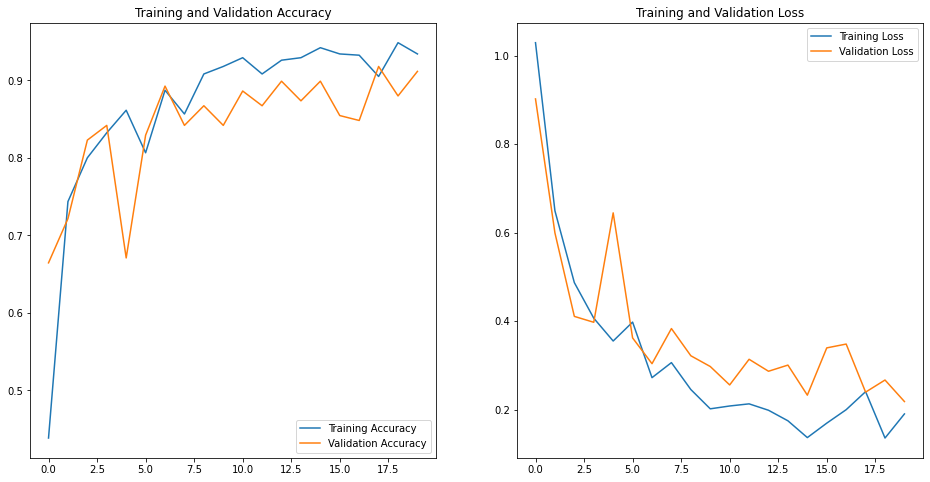

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Predicting labels for test data**

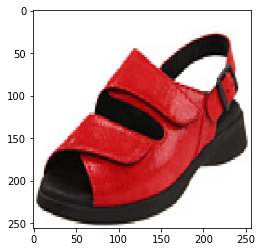

Boots


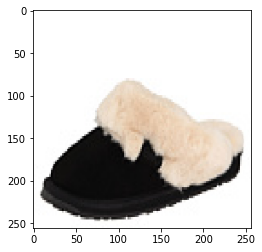

Slippers


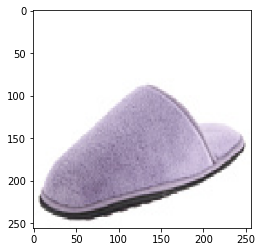

Slippers


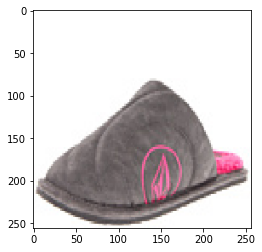

Slippers


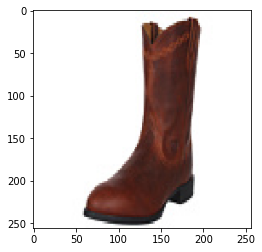

Boots


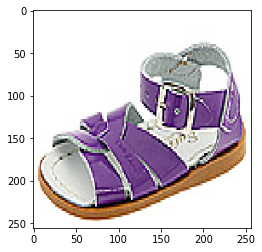

Sandals


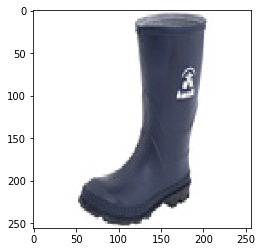

Boots


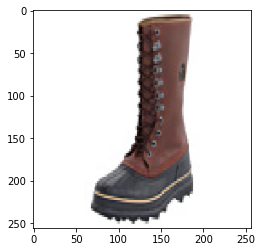

Boots


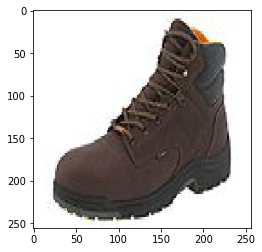

Boots


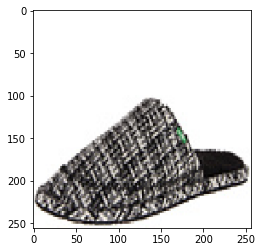

Slippers


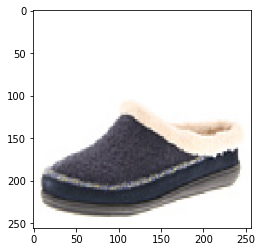

Slippers


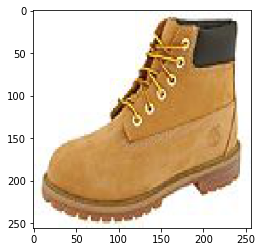

Boots


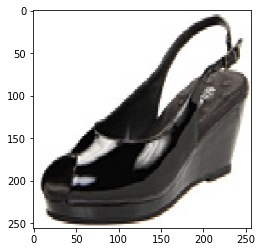

Sandals


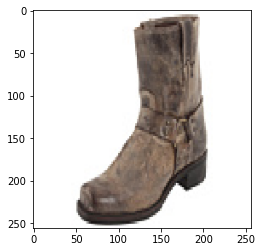

Boots


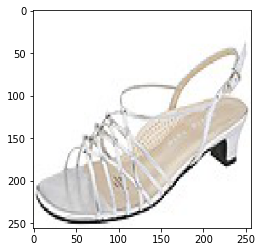

Sandals


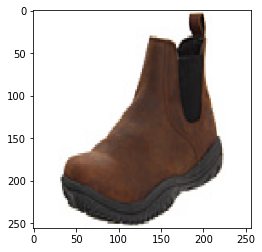

Boots


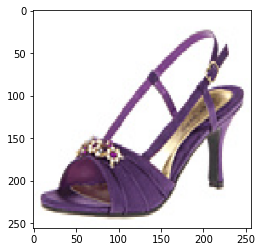

Sandals


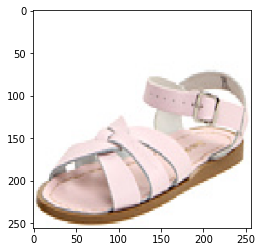

Sandals


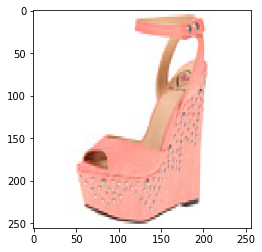

Sandals


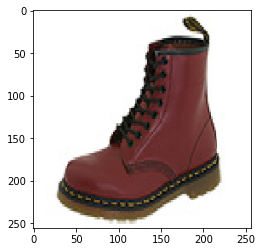

Boots


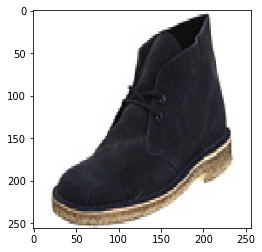

Boots


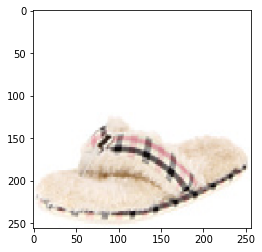

Slippers


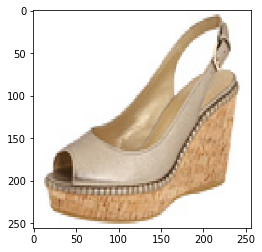

Sandals


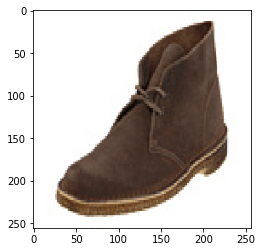

Boots


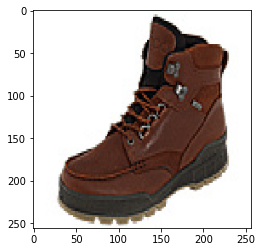

Boots


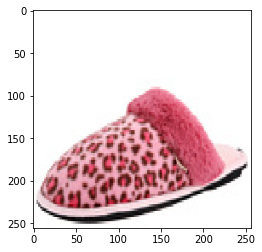

Slippers


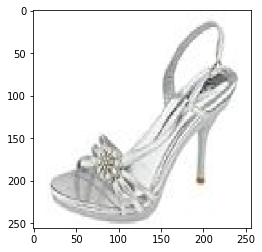

Slippers


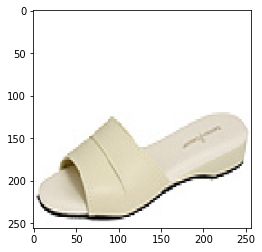

Sandals


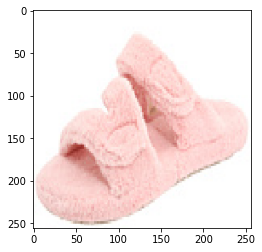

Sandals


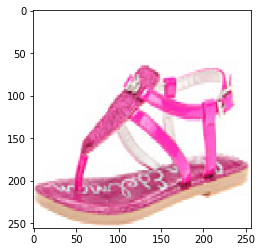

Sandals


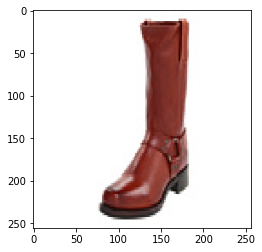

Boots


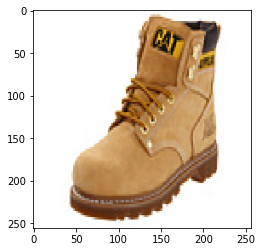

Boots


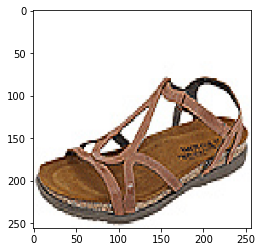

Sandals


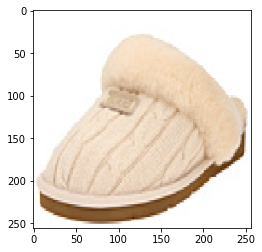

Slippers


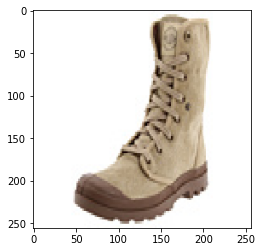

Boots


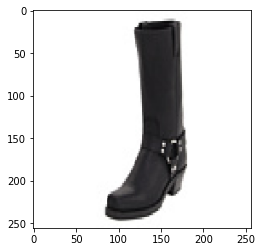

Boots


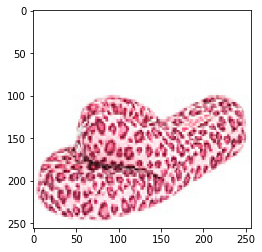

Slippers


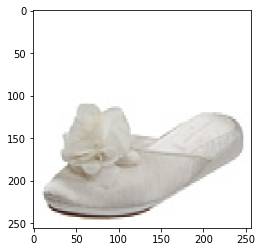

Slippers


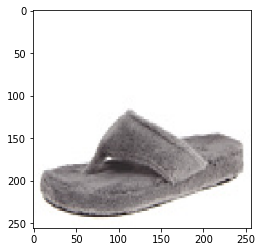

Slippers


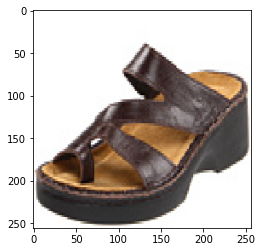

Sandals


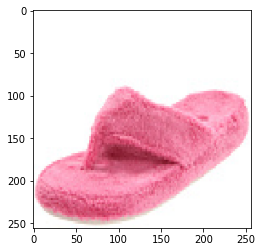

Slippers


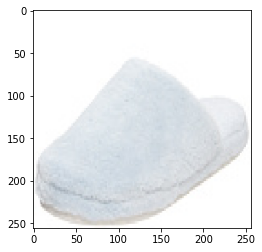

Slippers


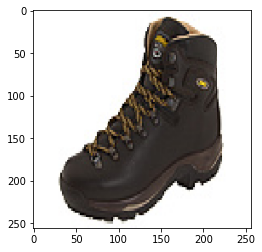

Boots


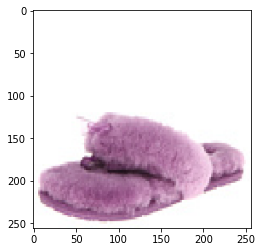

Slippers


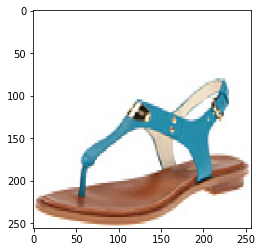

Sandals


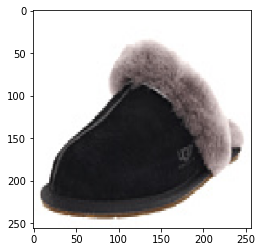

Slippers


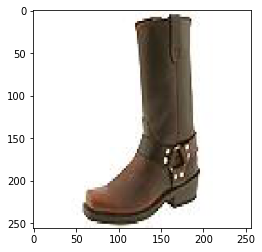

Boots


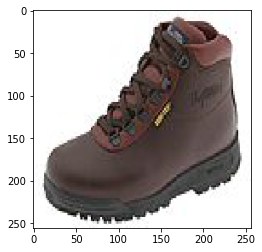

Boots


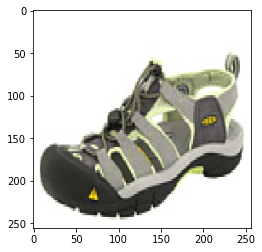

Sandals


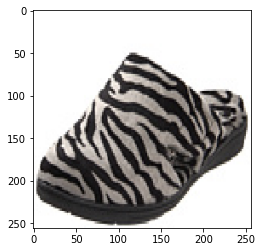

Sandals


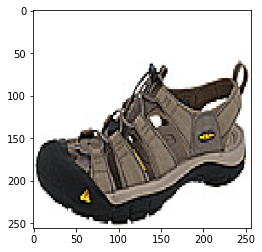

Sandals


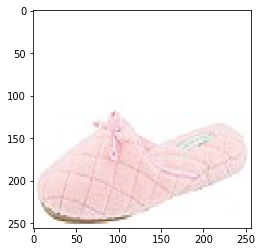

Slippers


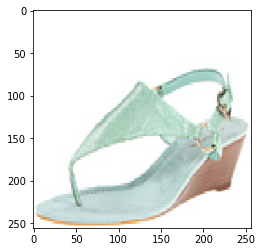

Sandals


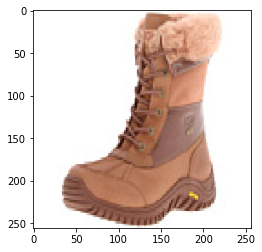

Boots


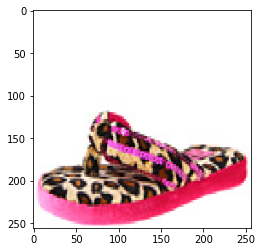

Slippers


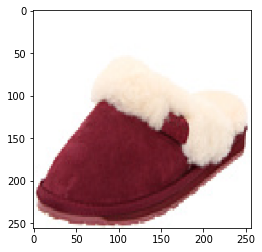

Slippers


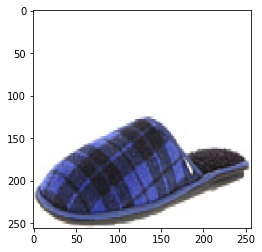

Slippers


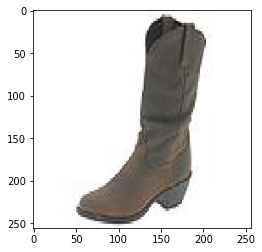

Boots


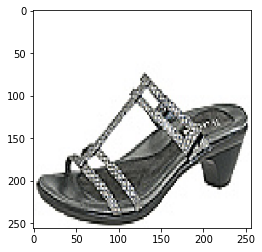

Sandals


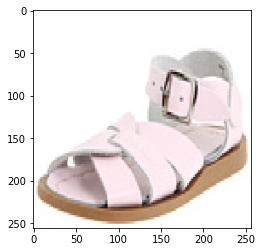

Sandals


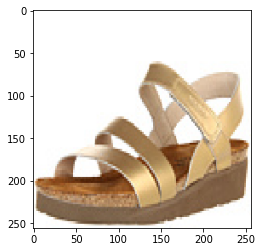

Sandals


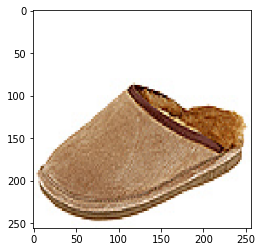

Slippers


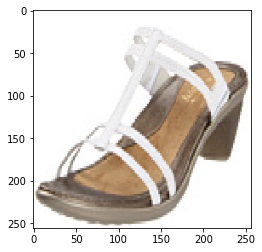

Sandals


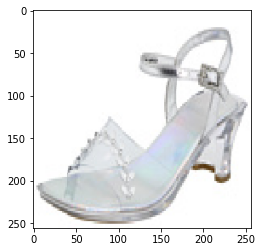

Slippers


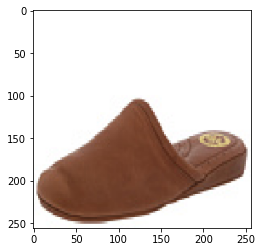

Slippers


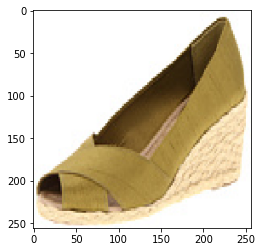

Sandals


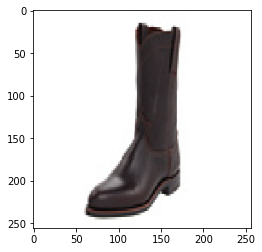

Boots


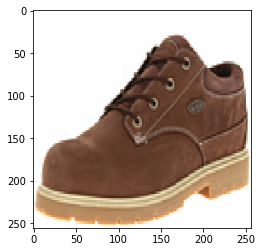

Boots


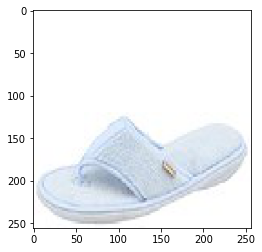

Slippers


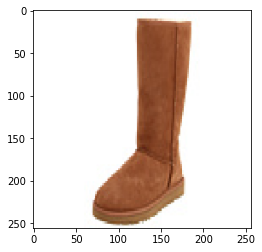

Boots


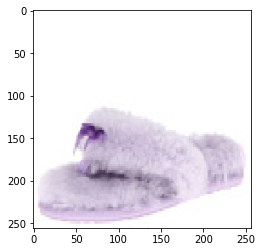

Slippers


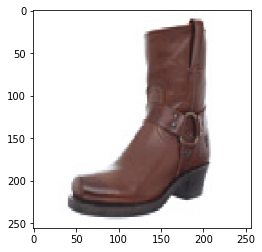

Boots


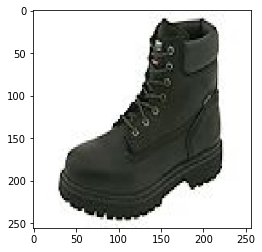

Boots


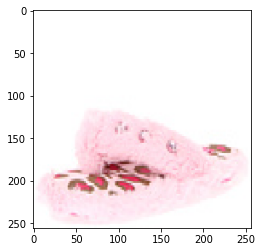

Slippers


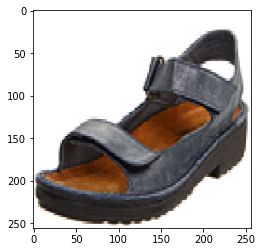

Sandals


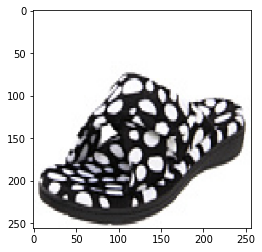

Sandals


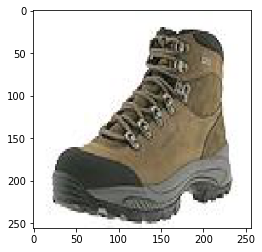

Boots


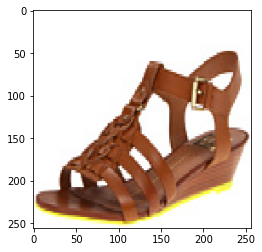

Sandals


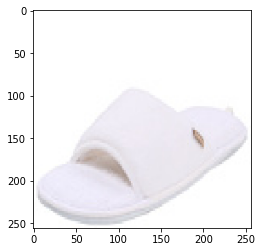

Slippers


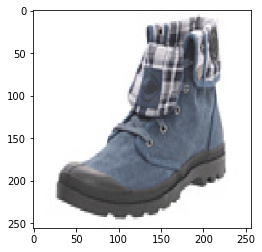

Boots


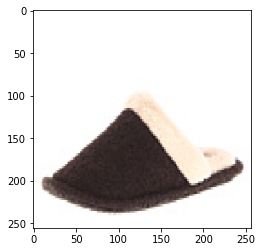

Slippers


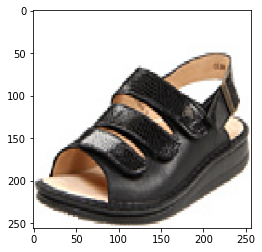

Sandals


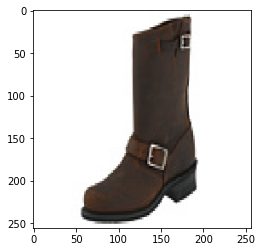

Boots


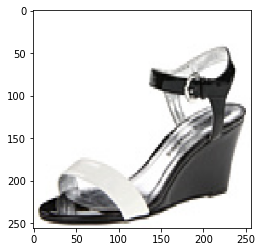

Sandals


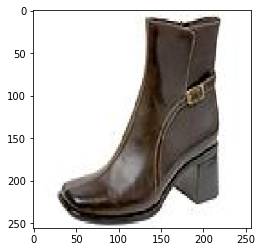

Boots


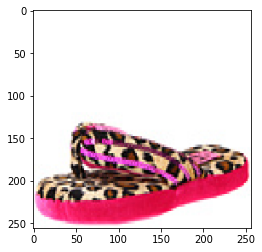

Sandals


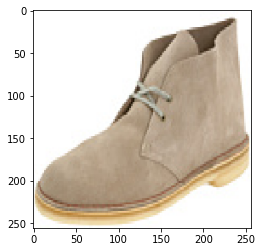

Boots


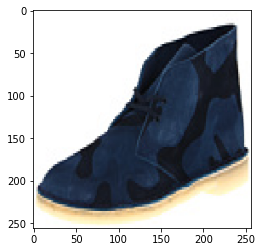

Boots


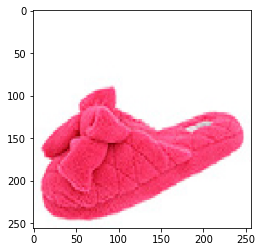

Slippers


In [39]:
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from os import listdir

# loading all images into list
image_path='/kaggle/input/simple-shoe-classification/Shoe Classification/test'
for filename in listdir(image_path):
        img_data = image.load_img(image_path + '/' + filename,target_size=(256,256))
        img_arr = image.img_to_array(img_data)
        plt.imshow(img_arr.astype('int'))
        plt.show()
        img_arr=np.expand_dims(img_arr,axis=0)
        pred=model.predict(img_arr)
        pred_class=np.argmax(pred,axis=1)
        if pred_class==0:
          print("Boots")
        elif pred_class==1:
          print("Sandals") 
        else:
          print("Slippers")      

In [40]:
test_datagen = ImageDataGenerator(
        rescale=1./255, #each and every pixel value will be multiplied with 1.0/255.0
        shear_range=0.2, #Bigger the number higher is the shearing in synthetic images
        zoom_range=0.2, #range will be from 0 to 0.2
        horizontal_flip=True)

In [41]:
test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/simple-shoe-classification/Shoe Classification/segr_test',
        target_size=(Image_size,Image_size),
        batch_size=32,
        class_mode="sparse",
)

Found 89 images belonging to 3 classes.


In [42]:
test_label= list(test_generator.class_indices.keys())

In [43]:
test_label

['Boots', 'Sandals', 'Slippers']

In [44]:
model.evaluate(test_generator)

3/3 [==============================] - 2s 628ms/step - loss: 0.4867 - accuracy: 0.8539


[0.4866938591003418, 0.8539325594902039]

**RESULT**:
*Loss and accuracies of the CNN model implemented.*

Training loss:24.06% Training Accuracy: 90.48%

Validation loss: 23.96% Validation Accuracy:91.77%

Testing loss:48.66% Testing Accuracy:85.39%